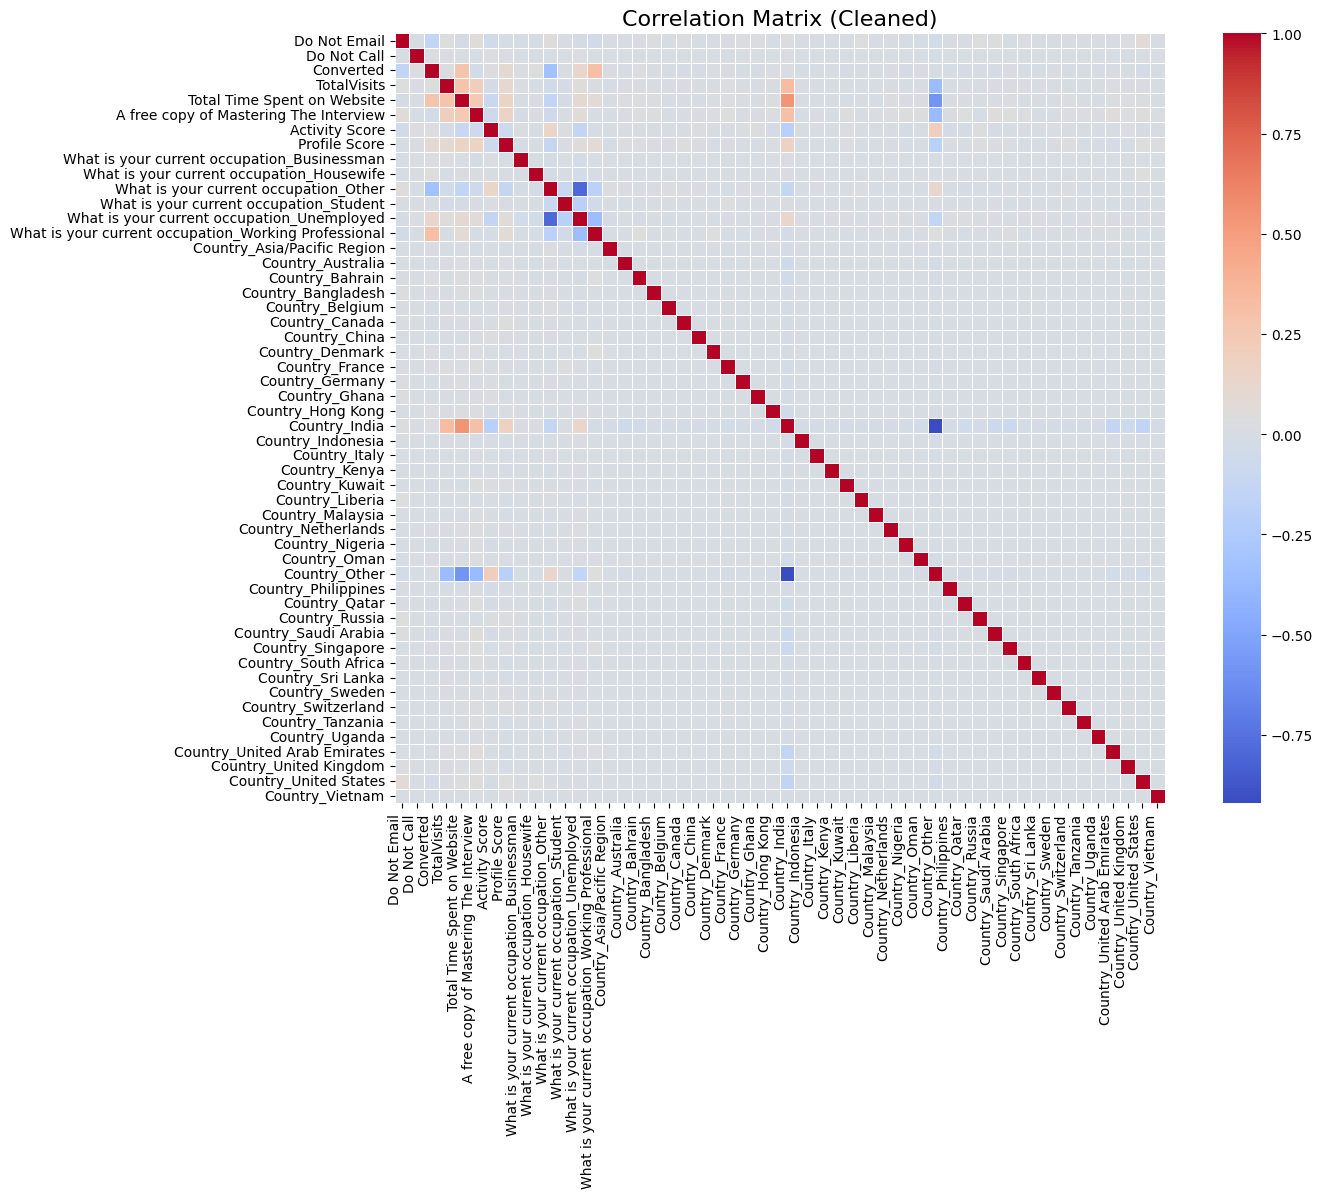

In [40]:
# ml model 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# load data
data = pd.read_csv('selected_features.csv')
data.drop(['Prospect ID'], axis=1, inplace=True)
data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1, inplace=True)

# correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(
    correlation_matrix, 
    annot=False,  
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)

plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title("Correlation Matrix (Cleaned)", fontsize=16)

plt.show()

C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier on test set: 0.77
[[1501  194]
 [ 451  626]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1695
           1       0.76      0.58      0.66      1077

    accuracy                           0.77      2772
   macro avg       0.77      0.73      0.74      2772
weighted avg       0.77      0.77      0.76      2772



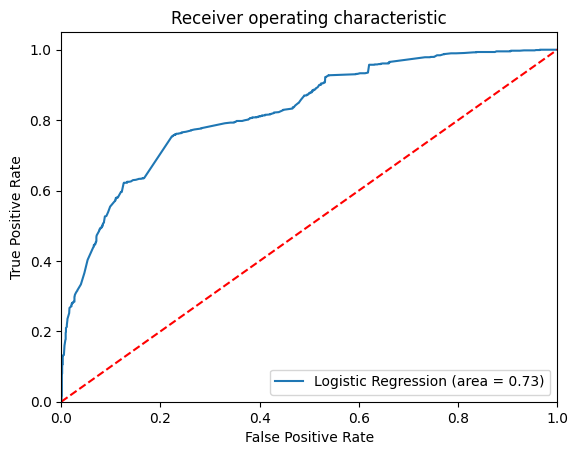

In [41]:
# check the logistic regression of all features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = data.drop(['Converted'], axis=1)
y = data['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#plot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [29]:
X = data.drop('Converted', axis=1)
y = data['Converted']
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# logisitic regression
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=200, random_state=42)

model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')



Accuracy: 0.7521645021645021
Confusion Matrix:
[[970 137]
 [321 420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1107
           1       0.75      0.57      0.65       741

    accuracy                           0.75      1848
   macro avg       0.75      0.72      0.73      1848
weighted avg       0.75      0.75      0.74      1848



C:\Users\varsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model2= DecisionTreeClassifier(random_state=42)

model2.fit(X_train, y_train)

predictions = model2.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7570346320346321
Confusion Matrix:
[[947 160]
 [289 452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1107
           1       0.74      0.61      0.67       741

    accuracy                           0.76      1848
   macro avg       0.75      0.73      0.74      1848
weighted avg       0.76      0.76      0.75      1848



In [32]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model3= RandomForestClassifier(random_state=42)

model3.fit(X_train, y_train)

predictions = model3.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7819264069264069
Confusion Matrix:
[[884 223]
 [180 561]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1107
           1       0.72      0.76      0.74       741

    accuracy                           0.78      1848
   macro avg       0.77      0.78      0.78      1848
weighted avg       0.78      0.78      0.78      1848



In [35]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\varsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
# XGBoost
import xgboost as xgb

model4 = xgb.XGBClassifier(random_state=42)

model4.fit(X_train, y_train)

predictions = model4.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, predictions)
print(f'Classification Report:\n{class_report}')



Accuracy: 0.7927489177489178
Confusion Matrix:
[[906 201]
 [182 559]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1107
           1       0.74      0.75      0.74       741

    accuracy                           0.79      1848
   macro avg       0.78      0.79      0.79      1848
weighted avg       0.79      0.79      0.79      1848

